In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

df = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\LOK SABHA.csv")

In [2]:
df.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
2,Andhra Pradesh,Adilabad,Ramesh Rathod,Male,48,ST,TDP,Bicycle,182879,1319,184198,1386282,2014,3,1045839,12476538,48367188,1028145613,184198,3
3,Andhra Pradesh,Adilabad,Rathod Sadashiv,Male,55,ST,BSP,Elephant,94363,57,94420,1386282,2014,4,1045839,12476538,48367188,1028145613,94420,4
4,Andhra Pradesh,Adilabad,Nethawath Ramdas,Male,44,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2014,5,1045839,12476538,48367188,1028145613,59733,5


## 1. top 5 candidates based on margin difference with runners in 2014 and 2019

In [141]:
query = """
select * from 
(
select 
    *,
    sum(case when rank = 1 then total_votes end) over(partition by pc_name, Year) - sum(case when rank = 2 then total_votes end) over(partition by pc_name, Year) as margin_diff
from
(
select 
    * 
from

(
select 
    *,
    row_number() over(partition by pc_name, Year order by total_votes desc) as rank
from
(
select 
    pc_name,
    Year,
    party,
    candidate,
    sum(total_votes) as total_votes
from
    df
group by
    pc_name, Year, party, candidate
                        ) as sub
                        ) as sub1
    
where 
    rank = 1 or rank = 2 
                        ) as sub2
                        ) as sub3
where rank = 1
order by
    margin_diff desc
"""
winner_candidates = sqldf(query)
winner_candidates

,pc_name,Year,party,candidate,total_votes,rank,margin_diff
0,Navsari,2019,BJP,C. R. Patil,972739,1,689668
1,Karnal,2019,BJP,Sanjay Bhatia,911594,1,656142
2,Faridabad,2019,BJP,Krishan Pal,913222,1,638239
3,Bhilwara,2019,BJP,Subhash Chandra Baheria,938160,1,612000
4,Vadodara,2019,BJP,Ranjanben Bhatt,883719,1,589177
...,...,...,...,...,...,...,...
1043,Andaman & Nicobar Islands,2019,INC,Kuldeep Rai Sharma,95308,1,1407
1044,Arambagh,2019,AITC,Aparupa Poddar (Afrin Ali),649929,1,1142
1045,Lakshadweep,2019,NCP,Mohammed Faizal Pp,22851,1,823
1046,Machhlishahr,2019,BJP,Bholanath (B.P. Saroj),488397,1,181


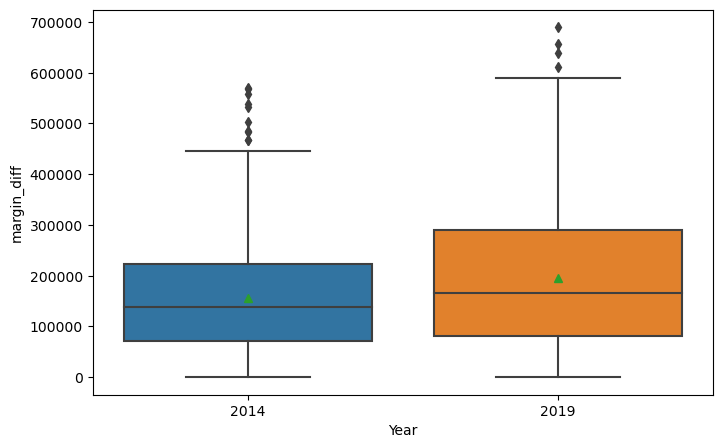

In [61]:
plt.figure(figsize = (8,5))
sns.boxplot(data = winner_candidates, y = 'margin_diff', showmeans = True, x = 'Year')
plt.show()

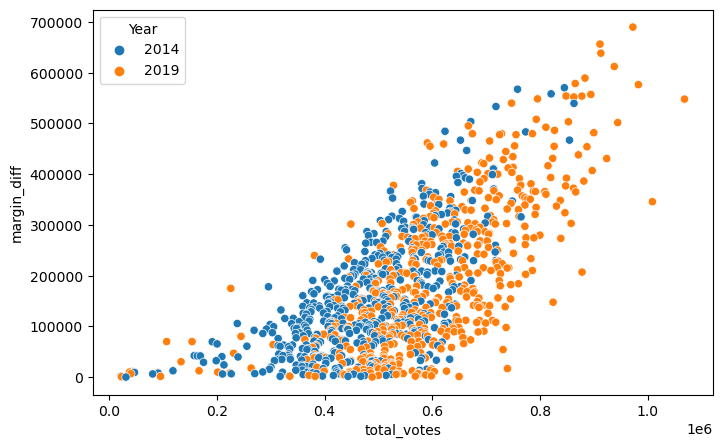

In [85]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = winner_candidates, x = 'total_votes', y = 'margin_diff', hue = 'Year',palette=['#1f77b4', '#ff7f0e'] )
plt.show()

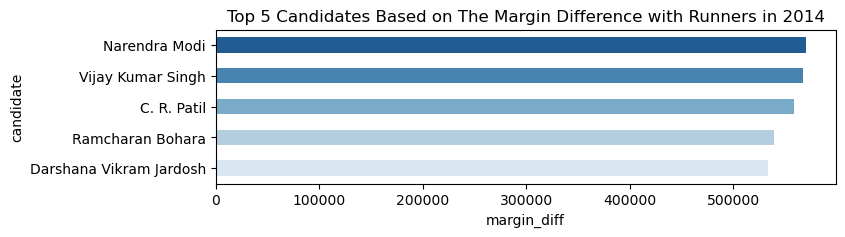

In [86]:
plt.figure(figsize = (8,2))
sns.barplot(data= winner_candidates[winner_candidates['Year'] == 2014][:5],
            y = 'candidate', x = 'margin_diff', palette = 'Blues_r', width = .5)
plt.title('Top 5 Candidates Based on The Margin Difference with Runners in 2014')
plt.show()

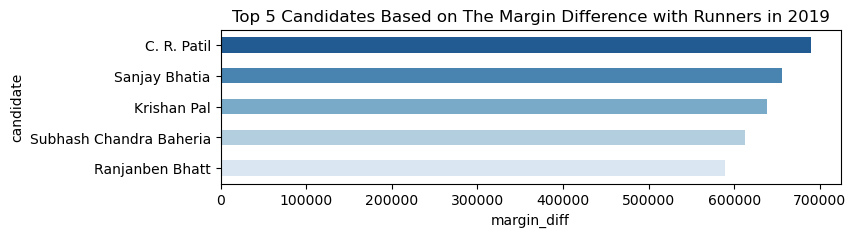

In [63]:
plt.figure(figsize = (8,2))
sns.barplot(data= winner_candidates[winner_candidates['Year'] == 2019][:5],
            y = 'candidate', x = 'margin_diff', palette = 'Blues_r', width = .5)
plt.title('Top 5 Candidates Based on The Margin Difference with Runners in 2019')
plt.show()

# 2. Gender Statistics

In [149]:
winners_data = pd.merge(winner_candidates, df.drop('age', axis = 1), on = ['candidate', 'Year', 'pc_name', 'party', 'total_votes'], how = 'inner').drop_duplicates()

In [150]:
winners_data

,pc_name,Year,party,candidate,total_votes,rank,margin_diff,state,sex,category,party_symbol,general_votes,postal_votes,total_electors
0,Navsari,2019,BJP,C. R. Patil,972739,1,689668,Gujarat,Male,GEN,Lotus,969430,3309,1971658
1,Karnal,2019,BJP,Sanjay Bhatia,911594,1,656142,Haryana,Male,GEN,Lotus,909432,2162,1904193
2,Faridabad,2019,BJP,Krishan Pal,913222,1,638239,Haryana,Male,GEN,Lotus,910787,2435,2071816
3,Bhilwara,2019,BJP,Subhash Chandra Baheria,938160,1,612000,Rajasthan,Male,GEN,Lotus,936065,2095,1997328
4,Vadodara,2019,BJP,Ranjanben Bhatt,883719,1,589177,Gujarat,Female,GEN,Lotus,880905,2814,1794896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Andaman & Nicobar Islands,2019,INC,Kuldeep Rai Sharma,95308,1,1407,Andaman & Nicobar Islands,Male,GEN,Hand,95249,59,318471
1044,Arambagh,2019,AITC,Aparupa Poddar (Afrin Ali),649929,1,1142,West Bengal,Female,SC,Flowers And Grass,649613,316,1764726
1045,Lakshadweep,2019,NCP,Mohammed Faizal Pp,22851,1,823,Lakshadweep,Male,ST,Clock,22796,55,55189
1046,Machhlishahr,2019,BJP,Bholanath (B.P. Saroj),488397,1,181,Uttar Pradesh,Male,SC,Lotus,487093,1304,1848306


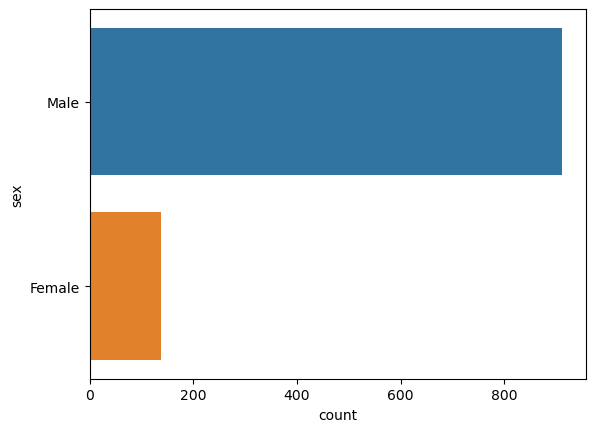

In [151]:
sns.countplot(data = winners_data, y = 'sex')
plt.show()

In [152]:
gender = winners_data.groupby('Year')['sex'].value_counts(normalize = True) * 100
gender.reset_index()

,Year,sex,proportion
0,2014,Male,88.385827
1,2014,Female,11.614173
2,2019,Male,85.555556
3,2019,Female,14.444444


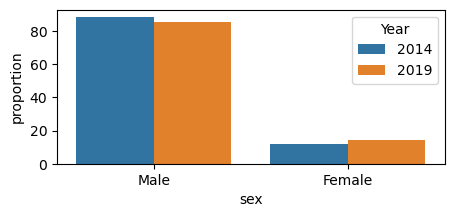

In [169]:
plt.figure(figsize = (5,2))
sns.barplot(data = gender.reset_index(), x = 'sex', y = 'proportion', hue = 'Year')
plt.show()

In [193]:
duplicated_winners = winners_data[winners_data['candidate'].duplicated()]['candidate']

In [196]:
winners_data[winners_data['candidate'].isin(duplicated_winners)]['candidate'].value_counts()

candidate
Mulayam Singh Yadav    3
Narendra Modi          3
Bhola Singh            3
C. R. Patil            2
Prasun Banerjee        2
                      ..
Janardan Mishra        2
Pratima Mondal         2
Abhishek Banerjee      2
Hema Malini            2
Sudarshan Bhagat       2
Name: count, Length: 129, dtype: int64

In [197]:
winners_data[winners_data['candidate'] == 'Mulayam Singh Yadav']

,pc_name,Year,party,candidate,total_votes,rank,margin_diff,state,sex,category,party_symbol,general_votes,postal_votes,total_electors
99,Mainpuri,2014,SP,Mulayam Singh Yadav,595918,1,364666,Uttar Pradesh,Male,GEN,Bicycle,595455,463,1653058
724,Mainpuri,2019,SP,Mulayam Singh Yadav,524926,1,94389,Uttar Pradesh,Male,GEN,Bicycle,523145,1781,1723236
827,Azamgarh,2014,SP,Mulayam Singh Yadav,340306,1,63204,Uttar Pradesh,Male,GEN,Bicycle,340084,222,1703121


In [198]:
winners_data[winners_data['candidate'] == 'Narendra Modi']

,pc_name,Year,party,candidate,total_votes,rank,margin_diff,state,sex,category,party_symbol,general_votes,postal_votes,total_electors
7,Vadodara,2014,BJP,Narendra Modi,845464,1,570128,Gujarat,Male,GEN,Lotus,841592,3872,1638321
31,Varanasi,2019,BJP,Narendra Modi,674664,1,479505,Uttar Pradesh,Male,GEN,Lotus,673453,1211,1856791
87,Varanasi,2014,BJP,Narendra Modi,581022,1,371784,Uttar Pradesh,Male,GEN,Lotus,580423,599,1766487


In [199]:
winners_data[winners_data['candidate'] == 'Bhola Singh']

,pc_name,Year,party,candidate,total_votes,rank,margin_diff,state,sex,category,party_symbol,general_votes,postal_votes,total_electors
52,Bulandshahr,2014,BJP,Bhola Singh,604449,1,421973,Uttar Pradesh,Male,SC,Lotus,603860,589,1736436
199,Bulandshahr,2019,BJP,Bhola Singh,681321,1,290057,Uttar Pradesh,Male,SC,Lotus,677196,4125,1787925
844,Begusarai,2014,BJP,Bhola Singh,428227,1,58335,Bihar,Male,GEN,Lotus,427987,240,1778759
